## Least-sqaured regression

### Imports

In [59]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-ticks")
from numpy.random import randn

### Values

In [65]:
n = 200 # Number of points
sigma = 2
sigma2 = 2*sigma**2
lam = 0.000001

# Approximation parameters
m = 20
w = randn(m) / sigma
b = np.random.rand(m)*2*np.pi

# Example functions
x = randn(n)/2
y=np.cos(x) + randn(n) # randn(n) is noise

x_sort = np.sort(x)

### Gaussian kernel

In [61]:
def k_gauss(x, z): 
    k = np.exp(-((np.linalg.norm(x-z))**2)/(2*sigma**2))
    return k

def K_gauss(x, y, n):
    Kxy = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            Kxy[i, j] = k_gauss(x[i], y[j])
    return Kxy

print(K_gauss(x, y, n))

[[0.74698094 0.6638798  0.67269709 ... 0.63481188 0.63344579 0.62814232]
 [0.99859099 0.9812753  0.98397691 ... 0.97099785 0.97046381 0.9683476 ]
 [0.99972113 0.98648821 0.98877562 ... 0.97754393 0.97707131 0.9751925 ]
 ...
 [0.98150678 0.94557628 0.95013399 ... 0.92937742 0.92857257 0.92541141]
 [0.97930047 0.94194313 0.94664074 ... 0.9253019  0.92447697 0.92123844]
 [0.96008771 0.91296728 0.91861161 ... 0.8933498  0.89239042 0.88863459]]


#### Alpha

In [62]:
def alpha_gauss(x, y, n):
    K = K_gauss(x, x, n)
    return np.linalg.inv(K + lam*np.eye(n)) @ y

alpha_ = alpha_gauss(x, y, n)
print(alpha_gauss(x, y, n))

[ 1.35342552e+01  2.09908215e+01  1.65542570e+01 -8.77693561e+00
  2.87600161e+01  3.25370494e+00 -1.13422721e+01  6.00453919e+01
 -9.42310232e+01 -1.17619287e+01  2.38550945e+00  2.23645355e+00
  2.11090820e+00  6.18387355e-03  1.28707233e+01 -1.41862676e+01
  1.30795619e+02 -1.58289694e+01  6.35019624e-01 -1.98056661e+00
  2.93712704e+00  1.44496480e+01  3.06856925e+01 -4.49848217e+00
 -9.44669240e+00 -1.13797240e+02 -1.22754761e+01  1.67693492e+00
  1.00199423e+01 -1.56848751e+01 -1.53781300e+01  1.17705042e+01
 -1.16778059e+00 -7.04961956e+00 -5.18941696e+00  2.14491437e+01
 -8.69439777e+00  8.88741872e+00  9.64503894e+00  1.63351702e+01
 -1.67785056e+01  1.09018273e+01  2.92663502e+01 -5.34913430e+00
 -3.88146825e+00  2.23945771e+01  1.22913926e+01 -4.11533476e+01
 -5.99643190e+00  8.30151809e+00 -1.59063571e+01  1.51230951e+01
  2.34526876e+01  1.02189053e+01 -1.59297174e+01  2.90343946e+01
  7.93147801e+00  9.39154493e+00 -1.42729398e+01 -4.46860349e+01
 -1.39177439e+01  1.34517

#### Estimated function

In [63]:
def function_gauss(x, n, alpha):
    x_sort = np.sort(x)
    f = np.zeros(n)
    for i in range(n):
        sum = 0
        for j in range(n):
            sum = sum + alpha[j] * k_gauss(x[j], x_sort[i])
        f[i] = sum
    return f

func = function_gauss(x, n, alpha_)
print(function_gauss(x, n, alpha_))

[-0.05497357  0.17499416  0.21428778  0.31157245  0.48528284  0.55323465
  0.56779612  0.58001933  0.59854896  0.60205481  0.64226025  0.64510422
  0.6762091   0.67724131  0.74701035  0.76672018  0.77837989  0.77995617
  0.78032494  0.79425768  0.79490059  0.7962279   0.79731866  0.81002243
  0.81400055  0.84100328  0.85993517  0.86522731  0.87013941  0.87521922
  0.8801946   0.8826077   0.88697096  0.88814433  0.90303344  0.9032412
  0.90390811  0.90669761  0.91307223  0.91649234  0.91836537  0.92184122
  0.9236901   0.92381527  0.92783231  0.93053045  0.93202135  0.93992207
  0.94544804  0.94735913  0.94843417  0.95211193  0.95261182  0.95330286
  0.95338341  0.95359573  0.95577935  0.95975784  0.9613664   0.96306829
  0.96331673  0.96505856  0.96559162  0.96561227  0.96649824  0.96678159
  0.96733673  0.96740308  0.97401306  0.97469147  0.97853117  0.98240294
  0.98323713  0.98342445  0.98359429  0.98504718  0.9867823   0.98794191
  0.98833402  0.98969348  0.99014896  0.99038373  0.

#### Plot

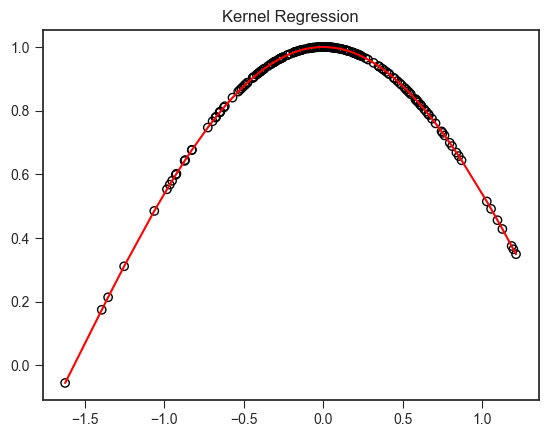

In [64]:
plt.scatter(x,y, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(x_sort, func, c="r", label="with Gaussian")
plt.title("Kernel Regression")
plt.show()

## Random Fourier Features

### Approximation 1

In [69]:
# Feature vector
def psi(x, w, b):
    return np.sqrt(2)*np.cos(w*x + b)

def k_approx1(x_i, z_i, w, b, m):
    return 1/m * np.sum(psi(x_i, w, b) * psi(z_i, w, b))
        
def K_approx1(x, z, w, b, m):
    K = np.zeros((m ,m))
    for i in range(m):
        for j in range(m):
            K[i, j] = k_approx1(x[i], y[i], w, b, m)
    return K

print(K_approx1(x, x, w, b, m))


[[0.92369452 0.92369452 0.92369452 0.92369452 0.92369452 0.92369452
  0.92369452 0.92369452 0.92369452 0.92369452 0.92369452 0.92369452
  0.92369452 0.92369452 0.92369452 0.92369452 0.92369452 0.92369452
  0.92369452 0.92369452]
 [1.13915964 1.13915964 1.13915964 1.13915964 1.13915964 1.13915964
  1.13915964 1.13915964 1.13915964 1.13915964 1.13915964 1.13915964
  1.13915964 1.13915964 1.13915964 1.13915964 1.13915964 1.13915964
  1.13915964 1.13915964]
 [1.02223939 1.02223939 1.02223939 1.02223939 1.02223939 1.02223939
  1.02223939 1.02223939 1.02223939 1.02223939 1.02223939 1.02223939
  1.02223939 1.02223939 1.02223939 1.02223939 1.02223939 1.02223939
  1.02223939 1.02223939]
 [0.88479121 0.88479121 0.88479121 0.88479121 0.88479121 0.88479121
  0.88479121 0.88479121 0.88479121 0.88479121 0.88479121 0.88479121
  0.88479121 0.88479121 0.88479121 0.88479121 0.88479121 0.88479121
  0.88479121 0.88479121]
 [1.01210671 1.01210671 1.01210671 1.01210671 1.01210671 1.01210671
  1.01210671 1.0